<a href="https://colab.research.google.com/github/tranletuhien/Tu-Hien/blob/main/Nhan_dien_hoa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.optimizers import SGD, RMSprop
from keras.models import Sequential, load_model
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import np_utils, to_categorical, load_img, img_to_array
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten, LeakyReLU
from keras.preprocessing.image import ImageDataGenerator

from sklearn import preprocessing
from sklearn.utils import validation
from sklearn.model_selection import train_test_split

In [16]:
%cd /content/drive/MyDrive/flowers

/content/drive/MyDrive/flowers


In [17]:
Data = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
Train = Data.flow_from_directory('/content/drive/MyDrive/flowers/Train', target_size=(150,150),batch_size=32, class_mode='categorical')
Train.class_indices


Found 4317 images belonging to 5 classes.


{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [18]:

model=Sequential()

model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(MaxPooling2D(2,2)) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(MaxPooling2D(2,2))

model.add(Flatten()) 

model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(5,activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 37, 37, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 37, 37, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 18, 18, 128)     

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
train=model.fit(Train, epochs=50, batch_size=256, verbose=1)

Epoch 1/50
135/135 [==============================] - 670s 5s/step - loss: 1.9977 - accuracy: 0.4373
Epoch 2/50
135/135 [==============================] - 308s 2s/step - loss: 1.1064 - accuracy: 0.5492
Epoch 3/50
135/135 [==============================] - 314s 2s/step - loss: 0.9871 - accuracy: 0.6111
Epoch 4/50
135/135 [==============================] - 316s 2s/step - loss: 0.8932 - accuracy: 0.6532
Epoch 5/50
135/135 [==============================] - 315s 2s/step - loss: 0.8075 - accuracy: 0.6938
Epoch 6/50
135/135 [==============================] - 307s 2s/step - loss: 0.7736 - accuracy: 0.7135
Epoch 7/50
135/135 [==============================] - 308s 2s/step - loss: 0.7175 - accuracy: 0.7311
Epoch 8/50
135/135 [==============================] - 302s 2s/step - loss: 0.6675 - accuracy: 0.7521
Epoch 9/50
135/135 [==============================] - 314s 2s/step - loss: 0.6035 - accuracy: 0.7744
Epoch 10/50
135/135 [==============================] - 308s 2s/step - loss: 0.5789 - accura

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Score=model.evaluate(Train,verbose=0)
print('Hàm Mất Mát Trên Tập Kiểm Tra : ', Score[0])
print('Độ Chính Xác Trên Tập Kiểm Tra : ', Score[1])

Hàm Mất Mát Trên Tập Kiểm Tra :  0.005501519422978163
Độ Chính Xác Trên Tập Kiểm Tra :  1.0


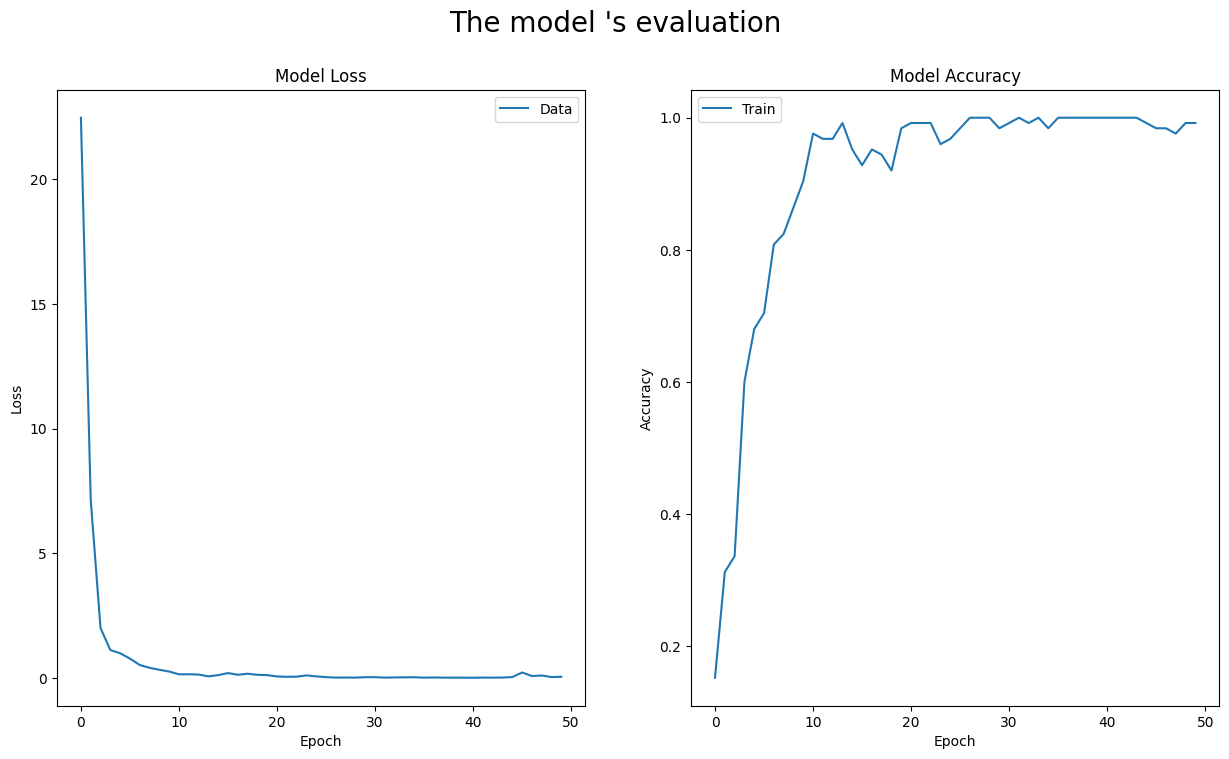

In [ ]:
fig,axes = plt.subplots(1,2, figsize=(15,8))
fig.suptitle("The model 's evaluation ",fontsize=20)

axes[0].plot(train.history['loss'])
axes[0].set_title('Model Loss')
axes[0].set_ylabel('Loss')
axes[0].set_xlabel('Epoch')
axes[0].legend(['Data'])

axes[1].plot(train.history['accuracy'])
axes[1].set_title('Model Accuracy')
axes[1].set_ylabel('Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].legend(['Train'])

plt.show()

In [ ]:
model.save('/content/drive/MyDrive/Saved_Train/bai4.h5')

In [ ]:
model_1 = load_model('/content/drive/MyDrive/Saved_Train/bai4.h5')

1/1 [==============================] - 0s 19ms/step
Đây là  : hoahong


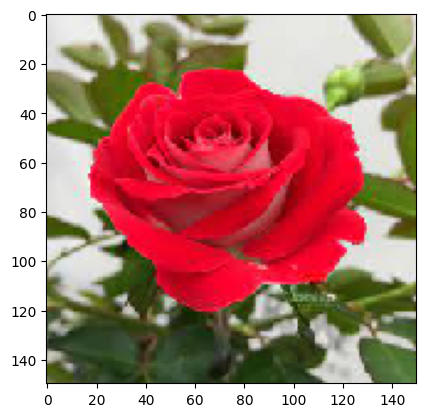

1/1 [==============================] - 0s 19ms/step
Đây là  : hoadao


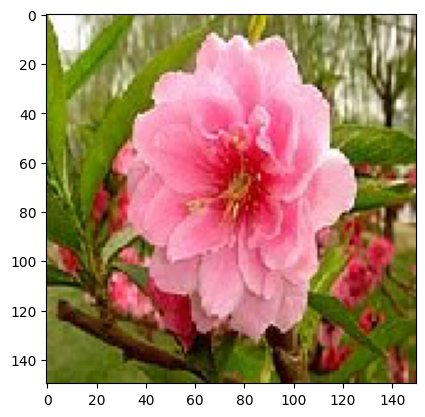

1/1 [==============================] - 0s 19ms/step
Đây là  : hoamai


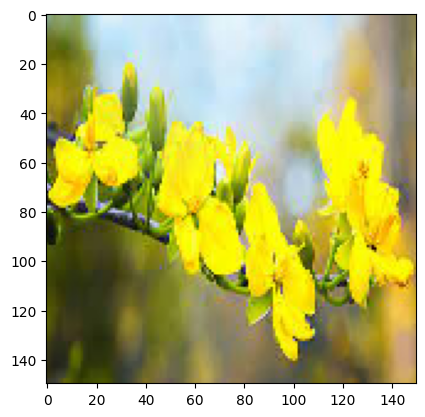

1/1 [==============================] - 0s 19ms/step
Đây là  : hoahuongduong


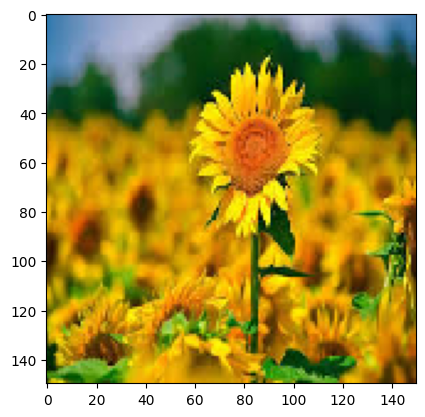

1/1 [==============================] - 0s 20ms/step
Đây là  : hoasu


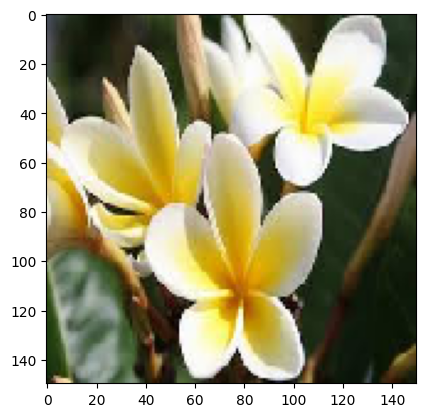

In [ ]:
folder='/content/drive/MyDrive/test/'
for i in os.listdir(folder):
  img=load_img(folder+i, target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=(model_1.predict(img).argmax())
  class_name=['hoadao', 'hoahong', 'hoahuongduong', 'hoamai', 'hoasu']
  print('Đây là  : {}'.format(class_name[result]))
  
  plt.show()